In [1]:
!python model.py

In [2]:
!python ddpg_agent.py

In [3]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

from ddpg_agent import Agent

%matplotlib inline

In [4]:
env = gym.make('Pendulum-v0')
env.seed(2)
agent = Agent(state_size = 3 , action_size = 1 , random_seed = 2)

c:\users\srimanth tenneti\appdata\local\programs\python\python37\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


c:\users\srimanth tenneti\appdata\local\programs\python\python37\lib\site-packages\torch\nn\functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: -1167.15
Episode 200	Average Score: -852.361
Episode 300	Average Score: -857.00
Episode 400	Average Score: -884.57
Episode 500	Average Score: -760.68
Episode 600	Average Score: -620.24
Episode 700	Average Score: -404.35
Episode 800	Average Score: -412.25
Episode 900	Average Score: -384.12
Episode 1000	Average Score: -392.97


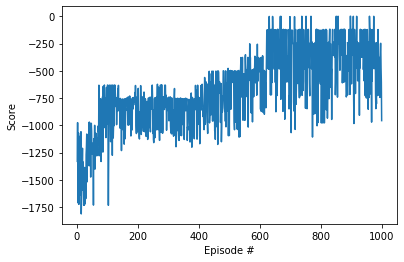

In [5]:
def ddpg(n_episodes=1000, max_t=300, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [24]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

state = env.reset()
for t in range(2000):
    action = agent.act(state, add_noise=False)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()